In [2]:
import pandas as pd
import numpy as np

In [12]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv(r'C:\Users\sam\Desktop\Telecommunication_data_analysis\data\cleaned_data.csv', engine = 'python')
db.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.310000e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,42,5,23,44,100,0,0,0,100,0,0,0,37624,38787,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1.545765,0.024420,1.634479,1.271433,3.563542,0.137762,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1,1.310000e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65,5,16,26,100,0,0,0,100,0,0,0,168,3560,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1.926113,0.007165,3.493924,0.920172,0.629046,0.308339,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,2,1.310000e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,45,5,6,9,100,0,0,0,100,0,0,0,0,0,Samsung,Samsung Galaxy A8 (2018),751,695,1.684053,0.042224,8.535055,1.694064,2.690151,0.672973,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,3,1.310000e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,45,5,44,44,100,0,0,0,100,0,0,0,3330,37882,undefined,undefined,17,207,0.644121,0.013372,9.023734,2.788027,1.439754,0.631229,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,4,1.310000e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,45,5,6,9,100,0,0,0,100,0,0,0,0,0,Samsung,Samsung Sm-G390F,607,604,0.862600,0.050188,6.248284,1.500559,1.936496,0.173853,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


In [13]:
df = db[['Bearer Id','MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)']]
df.head()

,Bearer Id,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,3.366496e+10,1823652,36.749741,308.879636
1,1.310000e+19,3.368185e+10,1365104,53.800391,653.384965
2,1.310000e+19,3.376063e+10,1361762,27.883638,279.807335
3,1.310000e+19,3.375034e+10,1321509,43.324218,846.028530
4,1.310000e+19,3.369980e+10,1089009,38.542814,569.138589


In [14]:
(df.sort_values(by=['MSISDN/Number'], ascending = False)).head(10)

,Bearer Id,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
123498,7.280000e+18,8.823970e+14,869844,60.456049,78.697597
124505,7.350000e+18,3.370000e+14,253030,56.652839,539.634985
98612,7.280000e+18,3.197020e+12,877385,37.295915,194.828056
56555,1.310000e+19,3.379000e+10,140988,35.732243,444.575092
23052,1.300000e+19,3.379000e+10,8810,26.716429,687.925212
9243,1.300000e+19,3.378998e+10,31864,44.546703,327.108945
27346,1.310000e+19,3.378998e+10,178525,26.284717,696.753021
106138,1.310000e+19,3.378997e+10,160461,34.066711,174.056356
56824,1.310000e+19,3.378996e+10,157069,36.147061,674.140514
47550,1.310000e+19,3.378996e+10,98826,49.913783,595.863904


In [15]:
df.agg('MSISDN/Number').head()

0    3.366496e+10
1    3.368185e+10
2    3.376063e+10
3    3.375034e+10
4    3.369980e+10
Name: MSISDN/Number, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler

def scaler(df):
    minmax_scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))
    return pd.DataFrame(minmax_scaler.fit_transform(df))

df2 = scaler(df)

In [19]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df))

df2 = normalizer(df2)

In [20]:
df2

,0,1,2,3,4
0,0.560965,-0.579418,0.557092,-0.059111,-0.189068
1,0.615615,-0.635865,0.296522,0.222469,0.281562
2,0.622605,-0.643085,0.297568,-0.216715,-0.251582
3,0.570467,-0.589232,0.247038,0.042556,0.514329
4,0.678931,-0.701264,0.117953,-0.038217,0.178627
...,...,...,...,...,...
148341,0.497060,-0.530873,-0.500810,0.184962,0.431374
148342,-0.519476,-0.586747,-0.539807,0.264817,0.156054
148343,-0.517347,-0.599435,-0.540645,-0.023258,0.283181
148344,0.571729,-0.590536,-0.532441,-0.089004,0.181599


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df2)

In [23]:
from matplotlib import pyplot as plt
plt.scatter(df2[y_kmeans == 0, 0], df2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df2[y_kmeans == 1, 0], df2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df2[y_kmeans == 2, 0], df2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

TypeError: '(array([False, False, False, ..., False, False, False]), 0)' is an invalid key

In [26]:
df3 = pd.DataFrame()

In [29]:
df3['sessions'] = db['Bearer Id']
df3['MSISDN/Number'] = db['MSISDN/Number']
df3['Duration'] = db['Dur. (ms)']
sum_column1 = db['Social Media UL (Bytes)'] + db['Social Media DL (Bytes)']
sum_column2 = db['Google UL (Bytes)'] + db['Google DL (Bytes)']
sum_column3 = db['Email DL (Bytes)'] + db['Email UL (Bytes)']
sum_column4 = db['Youtube DL (Bytes)'] + db['Youtube UL (Bytes)']
sum_column5 = db['Netflix DL (Bytes)'] + db['Netflix UL (Bytes)']
sum_column6 = db['Gaming UL (Bytes)'] + db['Gaming DL (Bytes)']
sum_column7 = db['Other DL (Bytes)'] + db['Other UL (Bytes)']
sum_column8 = db['Total UL (Bytes)'] + db['Total DL (Bytes)']
df3["Social Media DL+UL"] = sum_column1
df3["Google UL DL+UL"] = sum_column2
df3["Email DL+UL"] = sum_column3
df3["Youtube DL+UL"] = sum_column4
df3["Netflix DL+UL"] = sum_column5
df3["Gaming DL+UL"] = sum_column6
df3["Other DL+UL"] = sum_column7
df3["Total DL+UL"] = sum_column8

In [30]:
df3

,Social Media DL+UL,Google UL DL+UL,Email DL+UL,Youtube DL+UL,Netflix DL+UL,Gaming DL+UL,Other DL+UL,Total DL+UL,sessions,MSISDN/Number,Duration
0,1.570185,2.905912,3.701304,18.355943,17.855187,292.426453,180.558843,345.629377,1.310000e+19,3.366496e+10,1823652
1,1.933278,4.414096,0.937385,39.359124,35.565545,609.920783,541.959383,707.185356,1.310000e+19,3.368185e+10,1365104
2,1.726277,10.229119,3.363124,34.425237,23.751202,229.980251,414.908351,307.690973,1.310000e+19,3.376063e+10,1361762
3,0.657493,11.811761,2.070983,36.534765,15.092588,810.387875,761.837216,889.352748,1.310000e+19,3.375034e+10,1321509
4,0.912788,7.748843,2.110349,34.222253,17.539799,531.237049,564.619822,607.681403,1.310000e+19,3.369980e+10,1089009
...,...,...,...,...,...,...,...,...,...,...,...
148341,0.993175,1.265634,4.280107,24.553645,29.618711,797.160102,336.273648,872.761860,1.300000e+19,3.366865e+10,59587
148342,3.517065,12.784914,0.690876,27.955095,37.561864,535.806880,16.751926,631.804110,7.280000e+18,3.365069e+10,81230
148343,2.352181,4.415361,2.121718,22.165518,40.643294,631.628095,714.638145,705.783925,7.350000e+18,3.366345e+10,97970
148344,1.260239,6.585469,2.058277,24.516413,15.029702,566.933800,132.415585,627.698629,1.310000e+19,3.362189e+10,98249


In [33]:
#df3['Total'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
df3.agg({'Total DL+UL': 'sum'}).head(10)

Total DL+UL    7.355288e+07
dtype: float64

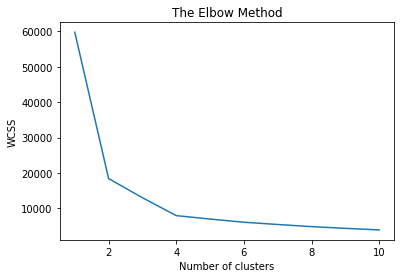

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### It seems 2 was a better choice for cluster groups since the bend is 2 on the y-axis